In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_pickle('/content/df.pkl')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715.0,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233.0,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565.0,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891.0,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,1N4BZ1CP5K,King,Seattle,WA,98107.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,43.0,2649419.0,POINT (-122.38591 47.67597),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
74996,1G1FW6S08J,King,Seattle,WA,98118.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,37.0,262763406.0,POINT (-122.2668 47.55115),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
74997,5YJ3E1EAXJ,Clark,Vancouver,WA,98661.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,49.0,278826299.0,POINT (-122.62934 45.63201),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
74998,WA1VCBGE1N,King,Seattle,WA,98136.0,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,34.0,226164606.0,POINT (-122.38415 47.53755),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [3]:
#data=pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
#data

In [4]:
#data.shape

In [5]:
#df=data.iloc[0:75000,:]
#df

In [6]:
df.shape

(75000, 16)

In [7]:
#Find counties with count < 1000
rare_counties = df['County'].value_counts()[df['County'].value_counts() < 1000].index
# Drop all rows where County is rare
df = df[~df['County'].isin(rare_counties)]
df['County'].value_counts()

,count
County,
King,54532
Clark,7639
Snohomish,3902
Kitsap,3603
Thurston,2793


In [8]:

rare_cities = df['City'].value_counts()[df['City'].value_counts() < 2000].index
df = df[~df['City'].isin(rare_cities)]
df['City'].value_counts()

,count
City,
Seattle,17359
Bellevue,6579
Vancouver,4814
Kirkland,4048
Sammamish,3903
Renton,2729
Redmond,2436
Bothell,2255
Kent,2077


In [9]:
rare_Make = df['Make'].value_counts()[df['Make'].value_counts() < 1300].index
df = df[~df['Make'].isin(rare_Make)]
df['Make'].value_counts()


,count
Make,
TESLA,19870
NISSAN,2816
CHEVROLET,2703
BMW,2369
KIA,2061
HYUNDAI,1821
TOYOTA,1747
FORD,1671
VOLVO,1558


In [10]:
rare_Model = df['Model'].value_counts()[df['Model'].value_counts() < 700].index
df = df[~df['Model'].isin(rare_Model)]
df['Model'].value_counts()


,count
Model,
MODEL Y,10605
MODEL 3,6455
LEAF,2417
MODEL X,1307
MODEL S,1250
BOLT EV,1179
IONIQ 5,1084
R1S,1046
MUSTANG MACH-E,805


In [11]:
df['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),26672
Plug-in Hybrid Electric Vehicle (PHEV),1698


In [12]:
rare_cafv = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts() < 700].index
df = df[~df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isin(rare_cafv)]
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,19736
Clean Alternative Fuel Vehicle Eligible,8426


In [13]:
df['Postal Code'].dtypes
df['Postal Code']=df['Postal Code'].astype(str)
rare_postal = df['Postal Code'].value_counts()[df['Postal Code'].value_counts() < 900].index
df = df[~df['Postal Code'].isin(rare_postal)]
df['Postal Code'].value_counts()


,count
Postal Code,
98052.0,1708
98006.0,1556
98033.0,1394
98074.0,1300
98075.0,1226
98034.0,1156
98004.0,1017
98125.0,902


In [14]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [15]:
df.shape

(10259, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10259 entries, 24 to 74994
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         10259 non-null  object 
 1   County                                             10259 non-null  object 
 2   City                                               10259 non-null  object 
 3   State                                              10259 non-null  object 
 4   Postal Code                                        10259 non-null  object 
 5   Model Year                                         10259 non-null  int64  
 6   Make                                               10259 non-null  object 
 7   Model                                              10259 non-null  object 
 8   Electric Vehicle Type                              10259 non-null  object 
 9   Clean Alte

In [17]:
fig = px.histogram(df,x='Electric Range',color='Model',histfunc='count',title='EV Type Count by Make')
fig.show()


This chart shows how the number of electric vehicles has increased over the years, with a sharp rise after 2015 and a major surge between 2020–2025. Each color represents a different EV model, and the stacked bars highlight that Tesla models contribute the most to this growth. It also shows the market becoming more diverse with many new EV models appearing after 2020.


In [18]:
fig = px.histogram(df,x='Model Year',color='Model',histfunc='count',title='EV Type Count by Make')
fig.show()

This code creates a stacked histogram showing how many electric vehicles were registered each year. The x-axis represents the model year, and each color represents a different EV model, so the stacked bars show how different models contributed to total EV registrations over time. The plot clearly highlights a sharp increase in EV adoption after 2015, with the highest growth between 2020–2025

In [19]:
for col in ['Make','County','Electric Vehicle Type',
            'Clean Alternative Fuel Vehicle (CAFV) Eligibility','State']:
    px.histogram(df, x=col, title=f"Count of {col}").show()


In [20]:
num_cols = ['Model Year','Electric Range']
for col in num_cols:
    px.box(df, y=col, title=f'Distribution of {col}').show()


In [21]:
q1,q2,q3=np.percentile(df['Electric Range'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['Electric Range']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['Electric Range']=np.where(df['Electric Range']>upper_bound,upper_bound,df['Electric Range'])
df['Electric Range']=np.where(df['Electric Range']<lower_bound,lower_bound,df['Electric Range'])


-60.0 100.0
[293.0, 220.0, 220.0, 266.0, 238.0, 308.0, 291.0, 215.0, 210.0, 208.0, 220.0, 200.0, 210.0, 220.0, 208.0, 150.0, 238.0, 238.0, 291.0, 107.0, 322.0, 249.0, 151.0, 220.0, 249.0, 150.0, 238.0, 215.0, 200.0, 208.0, 215.0, 220.0, 289.0, 215.0, 266.0, 249.0, 208.0, 266.0, 259.0, 289.0, 215.0, 215.0, 208.0, 293.0, 151.0, 322.0, 210.0, 238.0, 150.0, 259.0, 107.0, 238.0, 215.0, 293.0, 249.0, 215.0, 322.0, 151.0, 266.0, 215.0, 259.0, 291.0, 249.0, 200.0, 220.0, 150.0, 210.0, 322.0, 215.0, 215.0, 215.0, 208.0, 322.0, 215.0, 215.0, 238.0, 220.0, 289.0, 210.0, 208.0, 238.0, 208.0, 322.0, 330.0, 239.0, 215.0, 215.0, 270.0, 293.0, 215.0, 215.0, 208.0, 265.0, 266.0, 259.0, 266.0, 215.0, 249.0, 208.0, 293.0, 200.0, 215.0, 215.0, 215.0, 238.0, 220.0, 291.0, 249.0, 215.0, 220.0, 259.0, 220.0, 249.0, 208.0, 291.0, 291.0, 238.0, 215.0, 200.0, 210.0, 266.0, 238.0, 215.0, 259.0, 293.0, 266.0, 291.0, 249.0, 289.0, 220.0, 266.0, 238.0, 266.0, 208.0, 220.0, 266.0, 238.0, 210.0, 215.0, 291.0, 291.0, 

In [22]:
q1,q2,q3=np.percentile(df['Model Year'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['Model Year']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['Model Year']=np.where(df['Model Year']>upper_bound,upper_bound,df['Model Year'])
df['Model Year']=np.where(df['Model Year']<lower_bound,lower_bound,df['Model Year'])


2016.5 2028.5
[2011, 2016, 2015, 2013, 2015, 2013, 2016, 2015, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2013, 2015, 2013, 2013, 2013, 2014, 2012, 2015, 2015, 2013, 2015, 2015, 2016, 2015, 2011, 2016, 2015, 2014, 2016, 2014, 2016, 2015, 2015, 2015, 2015, 2013, 2013, 2013, 2016, 2016, 2013, 2015, 2013, 2016, 2015, 2013, 2016, 2016, 2012, 2016, 2016, 2015, 2015, 2013, 2013, 2015, 2016, 2016, 2016, 2016, 2016, 2013, 2016, 2013, 2011, 2015, 2015, 2014, 2016, 2016, 2014, 2015, 2015, 2015, 2014, 2013, 2013, 2016, 2016, 2013, 2015, 2012, 2013, 2016, 2015, 2015, 2012, 2014, 2013, 2013, 2016, 2016, 2012, 2012, 2015, 2016, 2016, 2013, 2015, 2013, 2013, 2013, 2014, 2014, 2013, 2015, 2016, 2014, 2013, 2012, 2016, 2015, 2015, 2013, 2013, 2013, 2013, 2015, 2015, 2015, 2016, 2011, 2016, 2014, 2013, 2015, 2014, 2015, 2015, 2015, 2016, 2012, 2016, 2011, 2013, 2014, 2014, 2016, 2013, 2013, 2016, 2013, 2012, 2015, 2016, 2013, 2016, 2013, 2016, 2016, 2015, 2015, 2016, 2013, 2016, 2016, 2016, 2012, 2013, 2

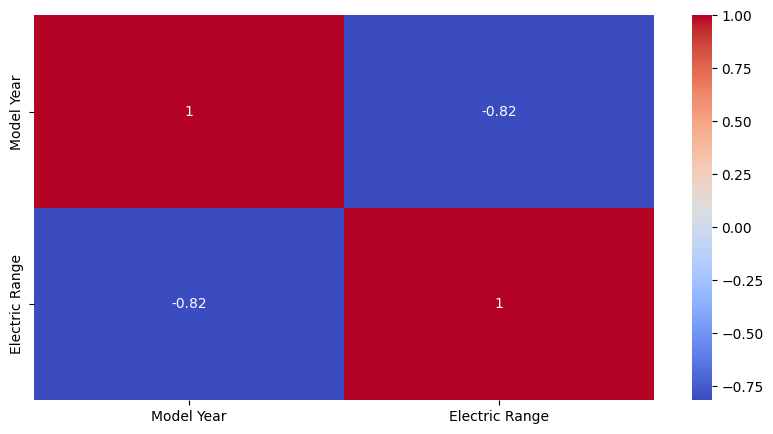

In [23]:

plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


This heatmap shows the correlation between the numeric features in the dataset. Electric Range has a moderate negative correlation (-0.56) with Model Year, meaning older vehicles tend to have lower range. The other features have correlations close to zero, indicating they are mostly independent and do not strongly influence each other

In [24]:
fig = px.histogram(df,x='Make',color='Electric Vehicle Type',histfunc='count',title='EV Type Count by Make')
fig.show()


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['County']=le.fit_transform(df['County'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)




King → 0


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)


Bellevue → 0
Kirkland → 1
Redmond → 2
Sammamish → 3
Seattle → 4


In [27]:
df['State']=le.fit_transform(df['State'])

In [28]:
df['Make'].value_counts()
df['Make']=le.fit_transform(df['Make'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)

BMW → 0
CHEVROLET → 1
FORD → 2
HYUNDAI → 3
KIA → 4
NISSAN → 5
RIVIAN → 6
TESLA → 7
TOYOTA → 8


In [29]:
df['Model'].value_counts()
df['Model']=le.fit_transform(df['Model'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)

BOLT EV → 0
IONIQ 5 → 1
LEAF → 2
MODEL 3 → 3
MODEL S → 4
MODEL X → 5
MODEL Y → 6
MUSTANG MACH-E → 7
NIRO → 8
R1S → 9
RAV4 PRIME (PHEV) → 10
X5 → 11


In [30]:
df['Electric Vehicle Type'].value_counts()
df['Electric Vehicle Type']=le.fit_transform(df['Electric Vehicle Type'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)

Battery Electric Vehicle (BEV) → 0
Plug-in Hybrid Electric Vehicle (PHEV) → 1


In [31]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=le.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)

Clean Alternative Fuel Vehicle Eligible → 0
Eligibility unknown as battery range has not been researched → 1


In [32]:
df['Electric Utility'].value_counts()
df['Electric Utility']=le.fit_transform(df['Electric Utility'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)

CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) → 0
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA) → 1


In [33]:
df['Postal Code'].value_counts()
df['Postal Code']=le.fit_transform(df['Postal Code'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(original, "→", encoded)

98004.0 → 0
98006.0 → 1
98033.0 → 2
98034.0 → 3
98052.0 → 4
98074.0 → 5
98075.0 → 6
98125.0 → 7


In [34]:
df=df.drop(['Legislative District','DOL Vehicle ID','Vehicle Location','VIN (1-10)','2020 Census Tract'],axis=1)

In [35]:
df['Age']=2026-df['Model Year']
df.drop('Model Year',axis=1,inplace=True)

In [36]:
df = df.reset_index(drop=True)
df.index = range(1, len(df) + 1)


In [37]:
df

,County,City,State,Postal Code,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility,Age
1,0,3,0,5,7,5,0,0,100.0,1,6.0
2,0,2,0,4,5,2,0,1,0.0,1,3.0
3,0,2,0,4,7,3,0,0,100.0,1,7.0
4,0,1,0,3,7,3,0,0,100.0,1,7.0
5,0,4,0,7,7,3,0,0,100.0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
10255,0,3,0,5,7,3,0,0,100.0,1,6.0
10256,0,2,0,4,7,6,0,1,0.0,1,0.0
10257,0,0,0,1,7,3,0,1,0.0,1,4.0
10258,0,1,0,2,7,6,0,1,0.0,1,2.0


In [38]:
X=df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility',axis=1)
X


,County,City,State,Postal Code,Make,Model,Electric Vehicle Type,Electric Range,Electric Utility,Age
1,0,3,0,5,7,5,0,100.0,1,6.0
2,0,2,0,4,5,2,0,0.0,1,3.0
3,0,2,0,4,7,3,0,100.0,1,7.0
4,0,1,0,3,7,3,0,100.0,1,7.0
5,0,4,0,7,7,3,0,100.0,0,6.0
...,...,...,...,...,...,...,...,...,...,...
10255,0,3,0,5,7,3,0,100.0,1,6.0
10256,0,2,0,4,7,6,0,0.0,1,0.0
10257,0,0,0,1,7,3,0,0.0,1,4.0
10258,0,1,0,2,7,6,0,0.0,1,2.0


In [39]:
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
y

,Clean Alternative Fuel Vehicle (CAFV) Eligibility
1,0
2,1
3,0
4,0
5,0
...,...
10255,0
10256,1
10257,1
10258,1


In [40]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['Age', 'Electric Range']
scaler = StandardScaler()
X_scaled = df.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
X_scaled


,County,City,State,Postal Code,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility,Age
1,0,3,0,5,7,5,0,0,1.841768,1,0.844934
2,0,2,0,4,5,2,0,1,-0.588093,1,-0.318059
3,0,2,0,4,7,3,0,0,1.841768,1,1.232598
4,0,1,0,3,7,3,0,0,1.841768,1,1.232598
5,0,4,0,7,7,3,0,0,1.841768,0,0.844934
...,...,...,...,...,...,...,...,...,...,...,...
10255,0,3,0,5,7,3,0,0,1.841768,1,0.844934
10256,0,2,0,4,7,6,0,1,-0.588093,1,-1.481052
10257,0,0,0,1,7,3,0,1,-0.588093,1,0.069605
10258,0,1,0,2,7,6,0,1,-0.588093,1,-0.705724


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.feature_selection import chi2, SelectKBest

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)


SelectKBest(k=5, score_func=<function chi2 at 0x784f8fd9d120>)

In [43]:
selected_features = X.columns[selector.get_support()]
selected_features


Index(['Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Age'], dtype='object')

In [44]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy', verbose=2)

In [46]:
rf_best = random_search.best_estimator_
rf_best

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [47]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [48]:
y_pred_rf=rf_best.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [50]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [51]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [52]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [53]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [54]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [55]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [56]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [57]:
cols_to_remove = ['Electric Range', 'Model', 'Make']
df_clean = df.drop(columns=cols_to_remove)


In [58]:
X_clean = df_clean.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)
y = df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [60]:
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [61]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)


In [62]:
print(mi_series)


Electric Range           0.587777
Age                      0.427501
Model                    0.235820
Make                     0.118226
Electric Vehicle Type    0.064394
Postal Code              0.016214
Electric Utility         0.005140
State                    0.001253
City                     0.000000
County                   0.000000
dtype: float64


Mutual Information (MI) was applied to evaluate how strongly each feature contributes to predicting the target variable. MI is a powerful feature selection technique that measures the amount of shared information between a feature and the target, capturing both linear and non-linear relationships without assuming any specific data distribution. The MI analysis revealed that Electric Range and Age contain the highest amount of information relevant to the target, followed by the Model and Make of the vehicle. These features carry strong predictive signals because CAFV eligibility is closely tied to a vehicle’s electric capability and design characteristics. In contrast, geographic variables such as County, State, City, and Postal Code showed near-zero MI scores, indicating that they offer little to no useful information for prediction. This analysis highlights which features drive the target outcome and also exposes potential leakage in the dataset, as the highest-scoring variables directly reveal eligibility status.

In [63]:
import joblib
joblib.dump(rf_best,'rf_best.pkl')

['rf_best.pkl']

In [67]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.0 MB/s eta 0:00:00


In [68]:
!pip install streamlit pyngrok==7.0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21132 sha256=efbf8736c942b9da2d11fd65ed857fbeabd1bf06b0a6c6368d33de0e055ecebf
  Stored in directory: /root/.cache/pip/wheels/da/ca/56/752aad2036022722df1dfeb4052493e92f64ea643c83b1bec7
Successfully built pyngrok
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 7.5.0
    Uninstalling pyngrok-7.5.0:
      Successfully uninstalled pyngrok-7.5.0


In [69]:
from pyngrok import ngrok
ngrok.set_auth_token("38BiQTRsmkL3sDq1qDkIAxBUO8r_4uC5ZDR7PmpTgr3pveXzu")


In [70]:
%%writefile app.py
import streamlit as st

st.title("Hello from Streamlit in Colab!")
st.write("This app is running using the NEW ngrok API.")


Writing app.py


In [71]:
!streamlit run app.py &>/dev/null&


In [72]:
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
public_url


<NgrokTunnel: "https://glauconitic-amatorially-ola.ngrok-free.dev" -> "http://localhost:8501">

In [73]:
!ps -e | grep streamlit


   6404 ?        00:00:02 streamlit


In [74]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Electric Utility', 'Age'],
      dtype='object')

In [75]:
X.columns

Index(['County', 'City', 'State', 'Postal Code', 'Make', 'Model',
       'Electric Vehicle Type', 'Electric Range', 'Electric Utility', 'Age'],
      dtype='object')

In [76]:
X.to_pickle("training_df.pkl")


In [80]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model
model = joblib.load("rf_best.pkl")

# Feature order
feature_order = ['County', 'City', 'State', 'Postal Code', 'Make', 'Model',
                 'Electric Vehicle Type', 'Electric Range', 'Electric Utility', 'Age']

# ---------------------------
# ENCODING DICTIONARIES
# ---------------------------

county_map = {"King": 1}

city_map = {
    "Bellevue": 0,
    "Kirkland": 1,
    "Redmond": 2,
    "Sammamish": 3,
    "Seattle": 4
}

make_map = {
    "BMW": 0,
    "CHEVROLET": 1,
    "FORD": 2,
    "HYUNDAI": 3,
    "KIA": 4,
    "NISSAN": 5,
    "RIVIAN": 6,
    "TESLA": 7,
    "TOYOTA": 8
}

model_map = {
    "BOLT EV": 0,
    "IONIQ 5": 1,
    "LEAF": 2,
    "MODEL 3": 3,
    "MODEL S": 4,
    "MODEL X": 5,
    "MODEL Y": 6,
    "MUSTANG MACH-E": 7,
    "NIRO": 8,
    "R1S": 9,
    "RAV4 PRIME (PHEV)": 10,
    "X5": 11
}

ev_type_map = {
    "Battery Electric Vehicle (BEV)": 0,
    "Plug-in Hybrid Electric Vehicle (PHEV)": 1
}

postal_map = {
    "98004": 0,
    "98006": 1,
    "98033": 2,
    "98034": 3,
    "98052": 4,
    "98074": 5,
    "98075": 6,
    "98125": 7
}

utility_map = {
    "CITY OF SEATTLE - (WA) | CITY OF TACOMA - (WA)": 0,
    "PUGET SOUND ENERGY INC | CITY OF TACOMA - (WA)": 1
}

# Target meaning map
cafv_map = {
    0: "Clean Alternative Fuel Vehicle Eligible",
    1: "Eligibility unknown as battery range has not been researched"
}

# ---------------------------
# STREAMLIT UI
# ---------------------------

st.title("CAFV Eligibility Prediction App")

county = st.selectbox("County", list(county_map.keys()))
city = st.selectbox("City", list(city_map.keys()))
state = st.selectbox("State", ["WA"])

postal = st.selectbox("Postal Code", list(postal_map.keys()))
make = st.selectbox("Make", list(make_map.keys()))
model_name = st.selectbox("Model", list(model_map.keys()))
ev_type = st.selectbox("Electric Vehicle Type", list(ev_type_map.keys()))
utility = st.selectbox("Electric Utility", list(utility_map.keys()))

electric_range = st.number_input("Electric Range", min_value=0)
age = st.number_input("Vehicle Age", min_value=0)

# ---------------------------
# PREDICTION
# ---------------------------

if st.button("Predict CAFV Eligibility"):

    input_row = [
        county_map[county],
        city_map[city],
        0,                      # WA
        postal_map[postal],
        make_map[make],
        model_map[model_name],
        ev_type_map[ev_type],
        electric_range,
        utility_map[utility],
        age
    ]

    final_df = pd.DataFrame([input_row], columns=feature_order)

    pred = model.predict(final_df)[0]
    meaning = cafv_map[pred]

    st.success(f"Prediction: {pred}")
    st.info(f"Meaning: {meaning}")


Overwriting app.py


In [85]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# ------------------ PAGE CONFIG ------------------
st.set_page_config(
    page_title="CAFV Eligibility Predictor",
    page_icon="🚗",
    layout="centered"
)

# ------------------ CUSTOM STYLING ------------------
page_style = """
<style>
/* Whole page background */
[data-testid="stAppViewContainer"] {
    background-color: #f5f5f9;
}

/* Title styling */
.title {
    font-size: 32px !important;
    font-weight: 700 !important;
    color: #2b2b2b;
    text-align: center;
    margin-bottom: 15px;
}

/* Description text */
.subtitle {
    font-size: 16px !important;
    color: #555;
    text-align: center;
    margin-bottom: 30px;
}

/* Input area box styling */
.box {
    background-color: white;
    padding: 25px;
    border-radius: 16px;
    box-shadow: 0px 4px 15px rgba(0,0,0,0.08);
    margin-bottom: 20px;
}

/* Prediction box */
.result-box {
    background-color: #eafbea;
    padding: 20px;
    border-radius: 16px;
    border-left: 6px solid #3ac47d;
    font-size: 18px;
    font-weight: 600;
    color: #1f6b43;
}

/* Meaning box */
.meaning-box {
    background-color: #eef3ff;
    padding: 18px;
    border-radius: 16px;
    border-left: 6px solid #4a6ee0;
    color: #2e4bb3;
    font-size: 16px;
    font-weight: 500;
}
</style>
"""
st.markdown(page_style, unsafe_allow_html=True)

# ------------------ TITLE ------------------
st.markdown("<h1 class='title'>🚗 CAFV Eligibility Prediction</h1>", unsafe_allow_html=True)
st.markdown("<p class='subtitle'>Enter electric vehicle details to predict CAFV eligibility</p>", unsafe_allow_html=True)

# ------------------ LOAD MODEL ------------------
model = joblib.load("rf_best.pkl")

# ---- encoding maps (as you provided) ----
county_map = {"King": 1}

city_map = {
    "Bellevue": 0, "Kirkland": 1, "Redmond": 2,
    "Sammamish": 3, "Seattle": 4
}

make_map = {
    "BMW":0,"CHEVROLET":1,"FORD":2,"HYUNDAI":3,"KIA":4,
    "NISSAN":5,"RIVIAN":6,"TESLA":7,"TOYOTA":8
}

model_map = {
    "BOLT EV":0,"IONIQ 5":1,"LEAF":2,"MODEL 3":3,"MODEL S":4,
    "MODEL X":5,"MODEL Y":6,"MUSTANG MACH-E":7,"NIRO":8,
    "R1S":9,"RAV4 PRIME (PHEV)":10,"X5":11
}

ev_type_map = {
    "Battery Electric Vehicle (BEV)": 0,
    "Plug-in Hybrid Electric Vehicle (PHEV)": 1
}

postal_map = {
    "98004":0,"98006":1,"98033":2,"98034":3,"98052":4,
    "98074":5,"98075":6,"98125":7
}

utility_map = {
    "CITY OF SEATTLE - (WA) | CITY OF TACOMA - (WA)":0,
    "PUGET SOUND ENERGY INC | CITY OF TACOMA - (WA)":1
}

cafv_map = {
    0: "Clean Alternative Fuel Vehicle Eligible",
    1: "Eligibility unknown as battery range has not been researched"
}

feature_order = ['County', 'City', 'State', 'Postal Code', 'Make', 'Model',
                 'Electric Vehicle Type', 'Electric Range', 'Electric Utility', 'Age']

# ------------------ INPUT FORM ------------------
st.markdown("<div class='box'>", unsafe_allow_html=True)

county = st.selectbox("County", list(county_map.keys()))
city = st.selectbox("City", list(city_map.keys()))
state = st.selectbox("State", ["WA"])
postal = st.selectbox("Postal Code", list(postal_map.keys()))

make = st.selectbox("Make", list(make_map.keys()))
model_name = st.selectbox("Model", list(model_map.keys()))

ev_type = st.selectbox("Electric Vehicle Type", list(ev_type_map.keys()))
utility = st.selectbox("Electric Utility", list(utility_map.keys()))

electric_range = st.number_input("Electric Range", min_value=0)
age = st.number_input("Vehicle Age", min_value=0)

st.markdown("</div>", unsafe_allow_html=True)

# ------------------ PREDICTION ------------------
if st.button("Predict CAFV Eligibility"):

    input_row = [
        county_map[county],
        city_map[city],
        0,                          # WA fixed
        postal_map[postal],
        make_map[make],
        model_map[model_name],
        ev_type_map[ev_type],
        electric_range,
        utility_map[utility],
        age
    ]

    final_df = pd.DataFrame([input_row], columns=feature_order)

    pred = model.predict(final_df)[0]
    meaning = cafv_map[pred]
    prob = model.predict_proba(final_df)[0][pred]

    st.markdown(f"<div class='result-box'>Prediction: {pred} &nbsp;&nbsp;•&nbsp;&nbsp; Confidence: {prob:.2f}</div>", unsafe_allow_html=True)
    st.markdown(f"<div class='meaning-box'>Meaning: {meaning}</div>", unsafe_allow_html=True)


Overwriting app.py


In [86]:
!streamlit run app.py &>/dev/null&


In [87]:
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
public_url


<NgrokTunnel: "https://glauconitic-amatorially-ola.ngrok-free.dev" -> "http://localhost:8501">

In [88]:
%%writefile requirements.txt
streamlit
scikit-learn
pandas
numpy
joblib
matplotlib
shap


Writing requirements.txt
